# Simulação 02 - Rede Ecologia
Gaspar Andrade – 133633<br>
UC: Modelagem Computacional – Prof. Marcos Quiles<br>
2020, UNIFESP – ICT<br>
***

## Introdução

A rede ecologia se refere a sequência em que os seres de uma determinada comunidade se alimentam. Esse processo é necessário para a continuidade e desenvolvimento das espécies.<br>
Na base da rede está os produtores, que a partir de processores naturais se desenvolvem e assim permitem o desenvolvimento da rede. Os consumidores primários, herbívoros, se alimentam do produtor. No próximo nível trófico, os consumidores secundários se alimentam dos herbívoros – eles são conhecidos como carnívoros.<br>
Para uma melhorar análise desse fenômeno é necessário a implementação de um modelo que visa analisar a relação nessa rede.<br>

## Cadeia Trófica
Foi utilizado como produtor nessa cadeia trófica a grama – representada pela função G(t).<br>
Os consumidores primários dessa rede são as Zebras e Impalas – representadas pelas funções Z(t) e I(t) respectivamente.<br>
A parte final é composta pelos consumidores secundários (carnívoros). O Leão e a Hiena foram as espécies utilizadas nessa simulação – representas por L(t) e H(t) respectivamente.<br>
<img src="./images/cadeia.png"> 

## Modelo Lotka-Volterra
É um modelo matematico que analísa a relação entre predador e presa. Foi desenvolvidor por dois matemáticos na década de 1920, o americano Alfred Lotka e o italiano Vito Volterra.<br>
<center>Temos como base a equação da variação da população da <b>presa</b> sendo:
$$\frac{dV}{dt} = P(αV - β)$$
    E a variação do <b>predador</b> dado por:
$$\frac{dP}{dt} = V(λ - φP)$$</center>

#  Modelo Logístico
A população de uma determinada espécie pode, em determinado momento, crescer exponencialmente. É necessário, para o estudo do crescimento populacional, a utilização de um limite superior para a função que representa essa espécie.<br>
O modelo logístico visa resolver esse problema. Através de um limite superior, definido como o nível de saturação ou capacidade do meio, ele faz com que a população não cresca indefinidademente.<br>
<center>Equação diferencial Logistica:
$$\frac{dP}{dt} = kP\bigl(1 - \frac{P}{M}\bigr)$$
</center>

## Equações
<img src="./images/tabela01.png">
<img src="./images/tabela02.png">

### <center>Equações</center>
<center><b>Grama</b> (Produtor):<br>
$$dG = G(t) \cdot \Bigl( A1 \cdot \Bigl(1 - \frac{G(t)}{K}\Bigr) - A2 \cdot Z(t) - A3 \cdot I(t) \Bigr) \cdot dT$$
<br>
    <b>Zebra</b> - herbívoro (consumidor primário):<br>
$$dZ = Z(t) \cdot \Bigl(B1 \cdot G(t) - B2 \cdot  L(t) - B3 \cdot H(t) - B4 \cdot Z(t)\Bigr) \cdot dT$$
<br>
    <b>Impala</b> - herbívoro (consumidor primário):<br>
$$dI = I(t) \cdot \Bigl(C1 \cdot G(t) - C2 \cdot L(t) - C3 \cdot H(t) - C4 \cdot I(t)\Bigr) \cdot dT$$
<br>
    <b>Leão</b> - carnívoro (consumidor secundário):<br>
$$dL = L(t) \cdot \Bigl(D1 \cdot Z(t) + D2 \cdot I(t) - D3 \cdot L(t)\Bigr) \cdot dT$$
<br>
    <b>Hiena</b> - carnívoro (consumidor secundário):<br>
$$dH = H(t) \cdot \Bigl(E1 \cdot Z(t) + E2 \cdot I(t) - E3 \cdot H(t)\Bigr) \cdot dT$$
</center>

In [1765]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cenário normal (sem pertubações)

In [1820]:
DT = 0.01
TMax = 500

# populacao inicial
G0 = 400
Z0 = 100
I0 = 120
L0 = 60
H0 = 40

G = G0
Z = Z0
I = I0
L = L0
H = H0

####---constantes---####
K = 3600 # capacidade do meio

# Grama
A1 = 57.34 # taxa de crescimento
A2 = 0.03 # consumo por zebras
A3 = 0.035 # consumo por impalas

# Zebra
B1 = 0.034 # consumo de grama
B2 = 0.005 # morte por leoes
B3 = 0.009 # morte por hienas
B4 = 0.003# constante de mortalidade

# Impala
C1 = 0.034 # consumo de grama
C2 = 0.009 # morte por leoes
C3 = 0.005 # morte por hienas
C4 = 0.001 # constante de mortalidade

# Leao
D1 = 0.012 # consumo de zebras
D2 = 0.015 # consumo de impalas
D3 = 0.016 # constante de mortalidadere

# Hiena
E1 = 0.017 # consumo de zebras
E2 = 0.013 # consumo de impalas
E3 = 0.014 # constante de mortalidade
####---fim constantes---####

t_array, g_array, z_array, i_array, h_array, l_array = [0], [G], [Z], [I], [H], [L]
for t in np.arange(DT, TMax, DT):
  Dg = G * ((A1*(1 - G/K)) - A2*Z - A3*I)*DT
  Dz = Z * (B1*G - B2*L - B3*H - B4*Z)*DT
  Di = I * (C1*G - C2*L - C3*H - C4*I)*DT
  Dl = L * (D1*Z + D2*I - D3*L)*DT
  Dh = H * (E1*Z + E2*I - E3*H)*DT
  
  G += Dg
  Z += Dz
  I += Di
  L += Dl
  H += Dh
  t_array.append(t)
  g_array.append(G)
  z_array.append(Z)
  i_array.append(I)
  h_array.append(H)
  l_array.append(L)
dados = pd.DataFrame({'tempo': t_array, 'grama': g_array, 'zebra': z_array, 'impala': i_array, 'hiena': h_array, 'leao': l_array})
dados.set_index('tempo', inplace=True)


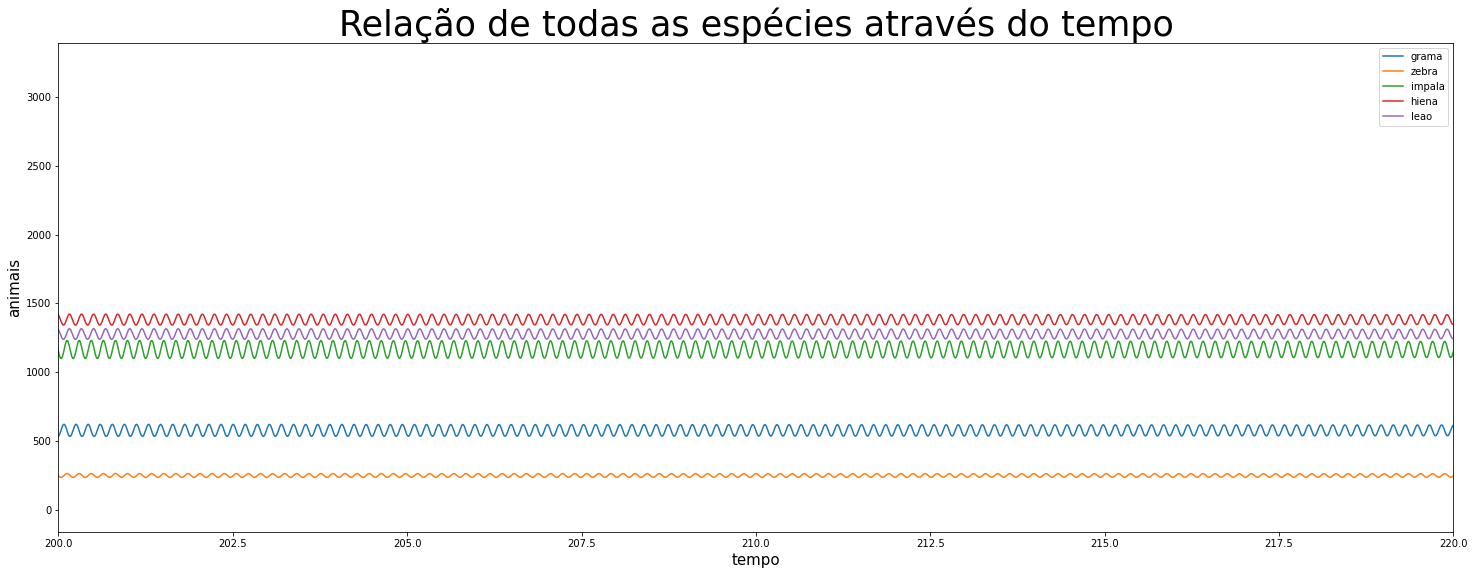

In [1828]:
plt.plot(dados)
plt.xlabel('tempo', fontsize=15)
plt.ylabel('animais', fontsize=15)
plt.legend(dados.columns.values, loc='upper right')
plt.rcParams["figure.figsize"] = [25,9]
plt.title('Relação de todas as espécies através do tempo', fontsize=35)
plt.xlim([200,220])
plt.show()

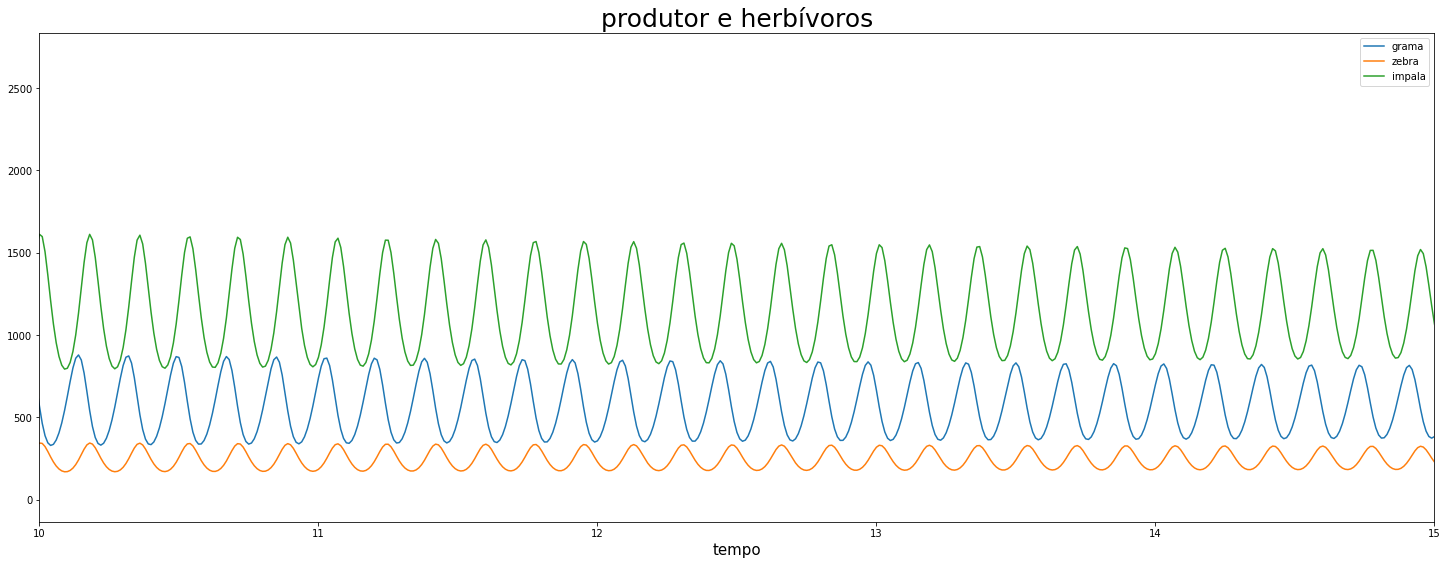

In [1817]:
plt.plot(dados['grama'], label='grama')
plt.plot(dados['zebra'], label='zebra')
plt.plot(dados['impala'], label='impala')
plt.legend(loc='upper right')
plt.xlabel('tempo', fontsize=15)
plt.xlim([10,15])
plt.title('produtor e herbívoros', fontsize=25)
plt.show()


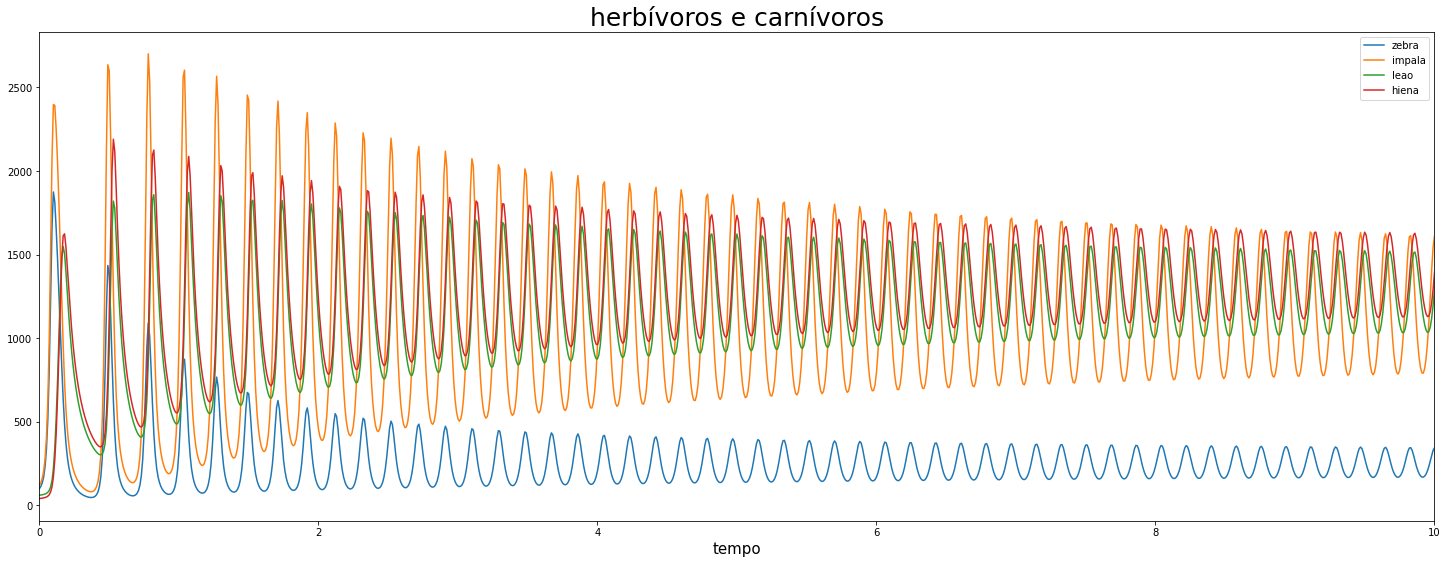

In [1818]:
plt.plot(dados['zebra'], label='zebra')
plt.plot(dados['impala'], label='impala')
plt.plot(dados['leao'], label='leao')
plt.plot(dados['hiena'], label='hiena')
plt.legend(loc='upper right')
plt.xlabel('tempo', fontsize=15)
plt.xlim([0,10])
plt.title('herbívoros e carnívoros', fontsize=25)
plt.show()

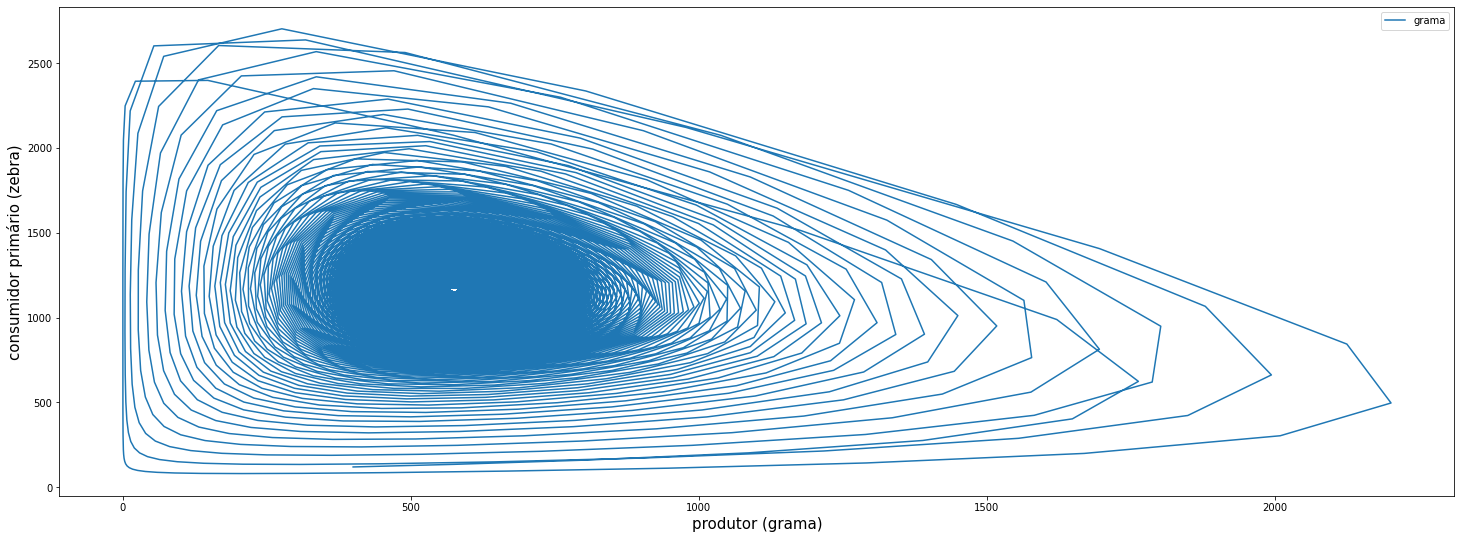

In [1819]:
plt.plot(dados['grama'], dados['impala'])
plt.xlabel('produtor (grama)', fontsize=15)
plt.ylabel('consumidor primário (zebra)', fontsize=15)
plt.legend(dados.columns.values, loc='upper right')
plt.show()


## Cenário anormal (com pertubações)
No instante t=35 temos uma queimada – ocasionando numa queda bruta na quantidade de grama.

In [1829]:
DT = 0.01
TMax = 500

# populacao inicial
G0 = 400
Z0 = 100
I0 = 120
L0 = 60
H0 = 40

G = G0
Z = Z0
I = I0
L = L0
H = H0

####---constantes---####
K = 3600 # capacidade do meio

# Grama
A1 = 57.34 # taxa de crescimento
A2 = 0.03 # consumo por zebras
A3 = 0.035 # consumo por impalas

# Zebra
B1 = 0.034 # consumo de grama
B2 = 0.005 # morte por leoes
B3 = 0.009 # morte por hienas
B4 = 0.003# constante de mortalidade

# Impala
C1 = 0.034 # consumo de grama
C2 = 0.009 # morte por leoes
C3 = 0.005 # morte por hienas
C4 = 0.001 # constante de mortalidade

# Leao
D1 = 0.012 # consumo de zebras
D2 = 0.015 # consumo de impalas
D3 = 0.016 # constante de mortalidadere

# Hiena
E1 = 0.017 # consumo de zebras
E2 = 0.013 # consumo de impalas
E3 = 0.014 # constante de mortalidade
####---fim constantes---####

t_array, g_array, z_array, i_array, h_array, l_array = [0], [G], [Z], [I], [H], [L]
for t in np.arange(DT, TMax, DT):
  Dg = G * ((A1*(1 - G/K)) - A2*Z - A3*I)*DT
  Dz = Z * (B1*G - B2*L - B3*H - B4*Z)*DT
  Di = I * (C1*G - C2*L - C3*H - C4*I)*DT
  Dl = L * (D1*Z + D2*I - D3*L)*DT
  Dh = H * (E1*Z + E2*I - E3*H)*DT
  
  G += Dg
  Z += Dz
  I += Di
  L += Dl
  H += Dh
  if t == 35:
      G = 0.3
  t_array.append(t)
  g_array.append(G)
  z_array.append(Z)
  i_array.append(I)
  h_array.append(H)
  l_array.append(L)
dados = pd.DataFrame({'tempo': t_array, 'grama': g_array, 'zebra': z_array, 'impala': i_array, 'hiena': h_array, 'leao': l_array})
dados.set_index('tempo', inplace=True)


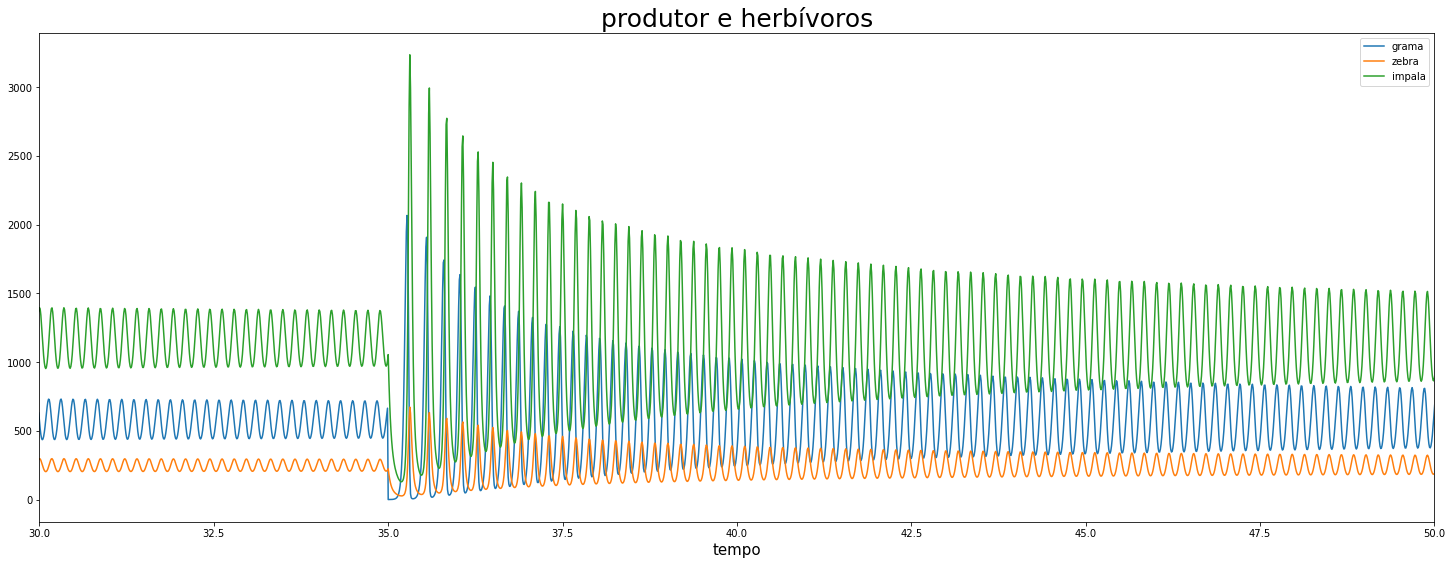

In [1831]:
plt.plot(dados['grama'], label='grama')
plt.plot(dados['zebra'], label='zebra')
plt.plot(dados['impala'], label='impala')
plt.legend(loc='upper right')
plt.xlabel('tempo', fontsize=15)
plt.xlim([30,50])
plt.title('produtor e herbívoros', fontsize=25)
plt.show()


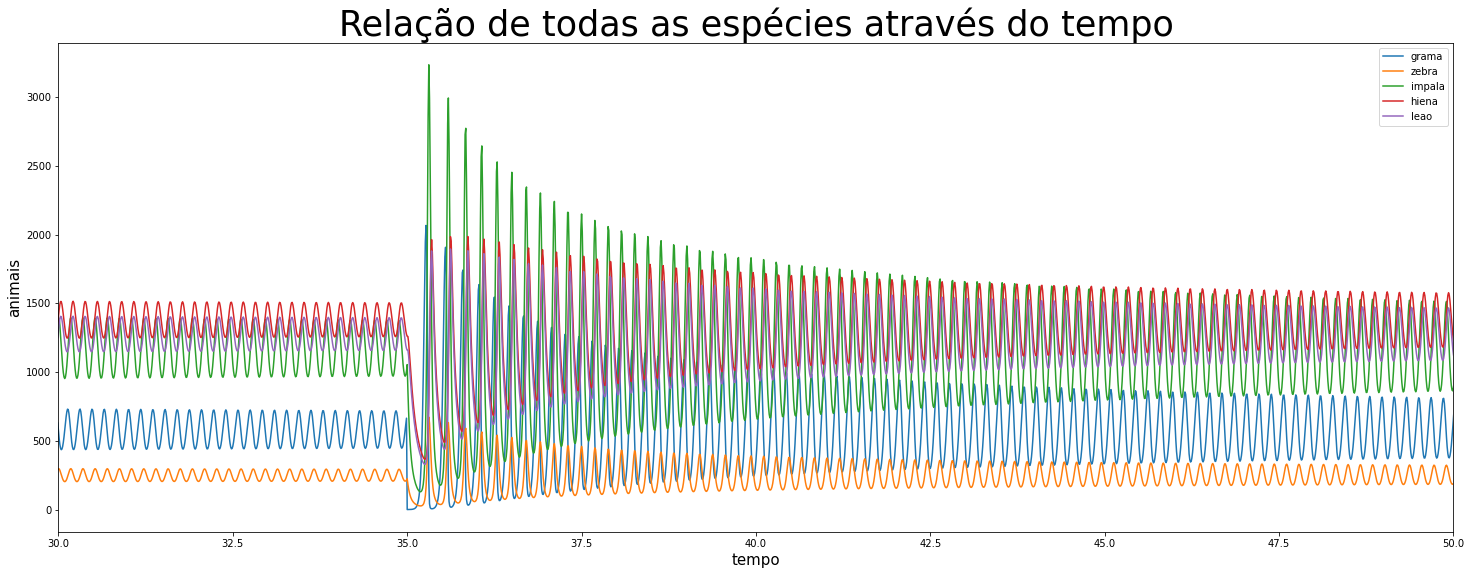

In [1833]:
plt.plot(dados)
plt.xlabel('tempo', fontsize=15)
plt.ylabel('animais', fontsize=15)
plt.legend(dados.columns.values, loc='upper right')
plt.rcParams["figure.figsize"] = [25,9]
plt.title('Relação de todas as espécies através do tempo', fontsize=35)
plt.xlim([30,50])
plt.show()

## Referências Bibliograficas
[1] Cadeias e Teias Alimentares - https://www2.unifap.br/alexandresantiago/files/2015/02/Cadeias_e_Teias_Alimentares.pdf<br>
[2] Modelo Predador-Presa http://ecologia.ib.usp.br/ecopop/doku.php?id=exercicios:exe_lvpp<br>
[3] James Stewart . Cálculo – Volume 2 – Cengage Learning